
Last 6 rows

     age  sex  cp  trtbps  chol  fbs  rest_ecg  thalachh  oldpeak  slp  caa  \
297   44    1   0     112   290    0         0       153      0.0    2    1   
298   55    1   0     132   353    0         1       132      1.2    1    1   
299   60    1   0     130   253    0         1       144      1.4    2    1   
300   59    1   0     164   176    1         0        90      1.0    1    2   
301   57    1   0     110   335    0         1       143      3.0    1    1   
302   50    1   2     140   233    0         1       163      0.6    1    1   

     thall  exng  output  
297      2     0       0  
298      3     1       0  
299      3     1       0  
300      1     0       0  
301      3     1       0  
302      3     0       0  

First 6 rows

   age  sex  cp  trtbps  chol  fbs  rest_ecg  thalachh  oldpeak  slp  caa  \
0   42    1   1     120   295    0         1       162      0.0    2    0   
1   35    1   1     122   192    0         1       174      0.0    2    0 

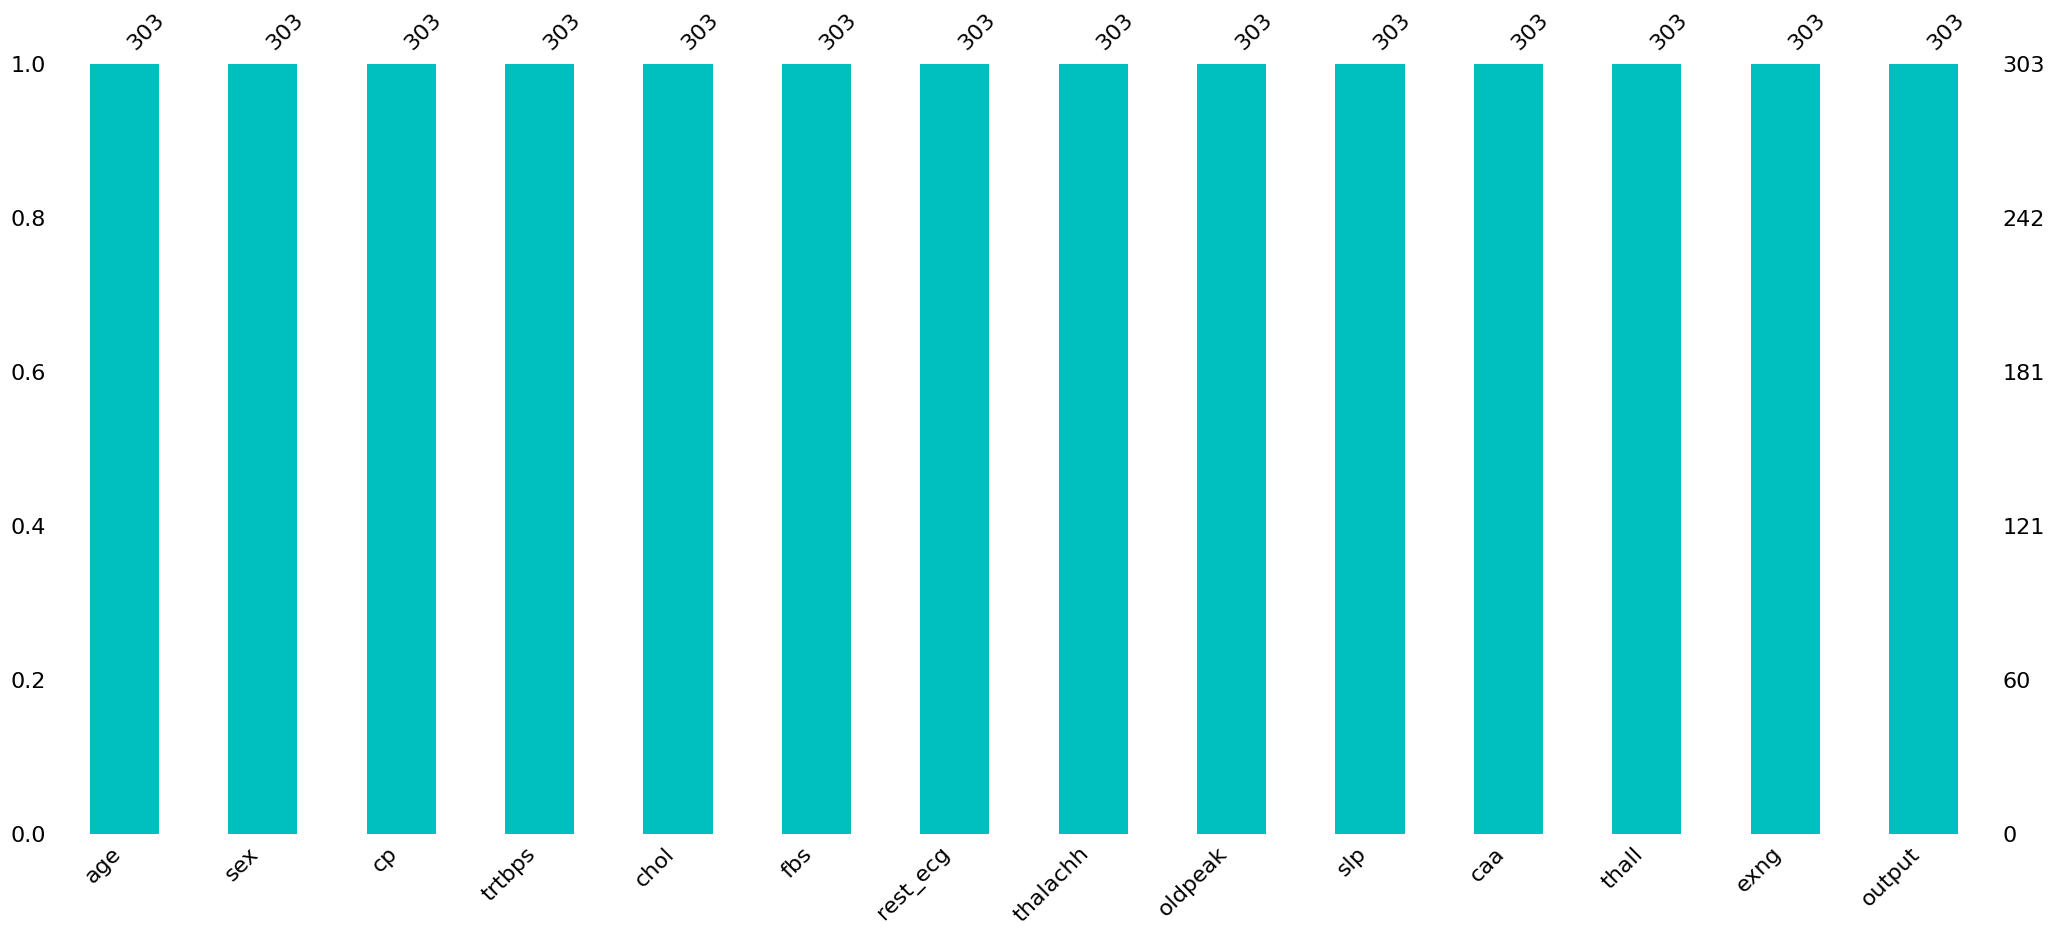


Basic Stat

             age         sex          cp      trtbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

         rest_ecg    thalachh     oldpeak         slp         caa       thall  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    1.043046    1.397351    0.718543    2.314570   
std      0.526027   22.

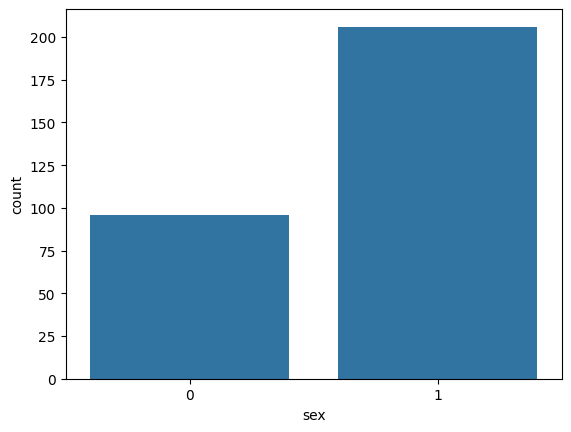

C:\Users\user0\AppData\Local\Temp\ipykernel_53496\3251721471.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=heartds0['output'], palette=mypal[1::4])
C:\Users\user0\AppData\Local\Temp\ipykernel_53496\3251721471.py:109: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  heartds0_table = pd.concat([heartds0_table, df])
c:\Users\user0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.

,Classifier,Accuracy,ROC_AUC,Recall,Precision,F1
0,Naive Bayes,85.530000,0.910000,0.850000,0.910000,0.880000
1,Logistic Regression,84.210000,0.890000,0.870000,0.870000,0.870000
9,Linear DA,82.890000,0.890000,0.870000,0.850000,0.860000
4,Nu SVC,81.580000,0.840000,0.850000,0.850000,0.850000
10,Quadratic DA,80.260000,0.870000,0.790000,0.880000,0.830000
6,Random Forest,78.950000,0.890000,0.830000,0.830000,0.830000
7,AdaBoost,78.950000,0.880000,0.740000,0.900000,0.810000
8,Gradient Boosting,76.320000,0.860000,0.740000,0.850000,0.800000
5,Decision Tree,71.050000,0.710000,0.720000,0.790000,0.760000
3,Support Vectors,65.790000,0.670000,0.700000,0.730000,0.720000


c:\Users\user0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\user0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


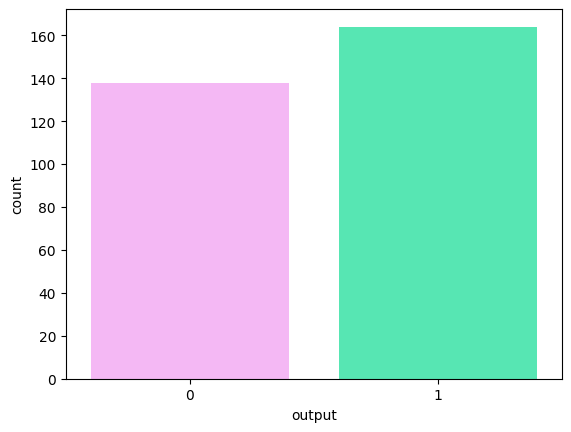

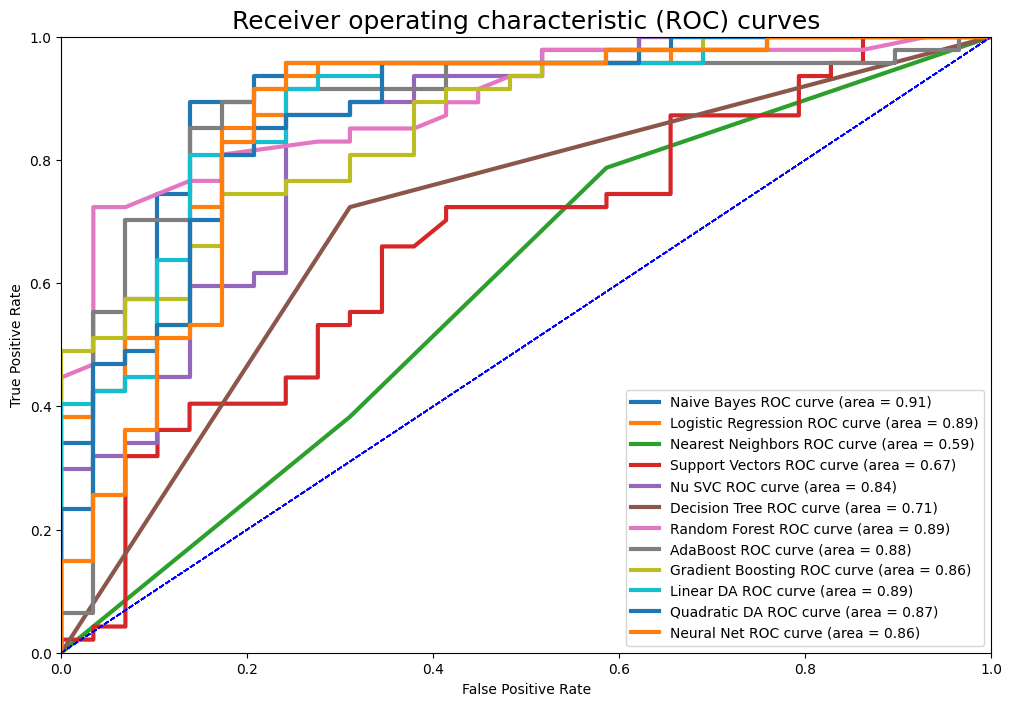

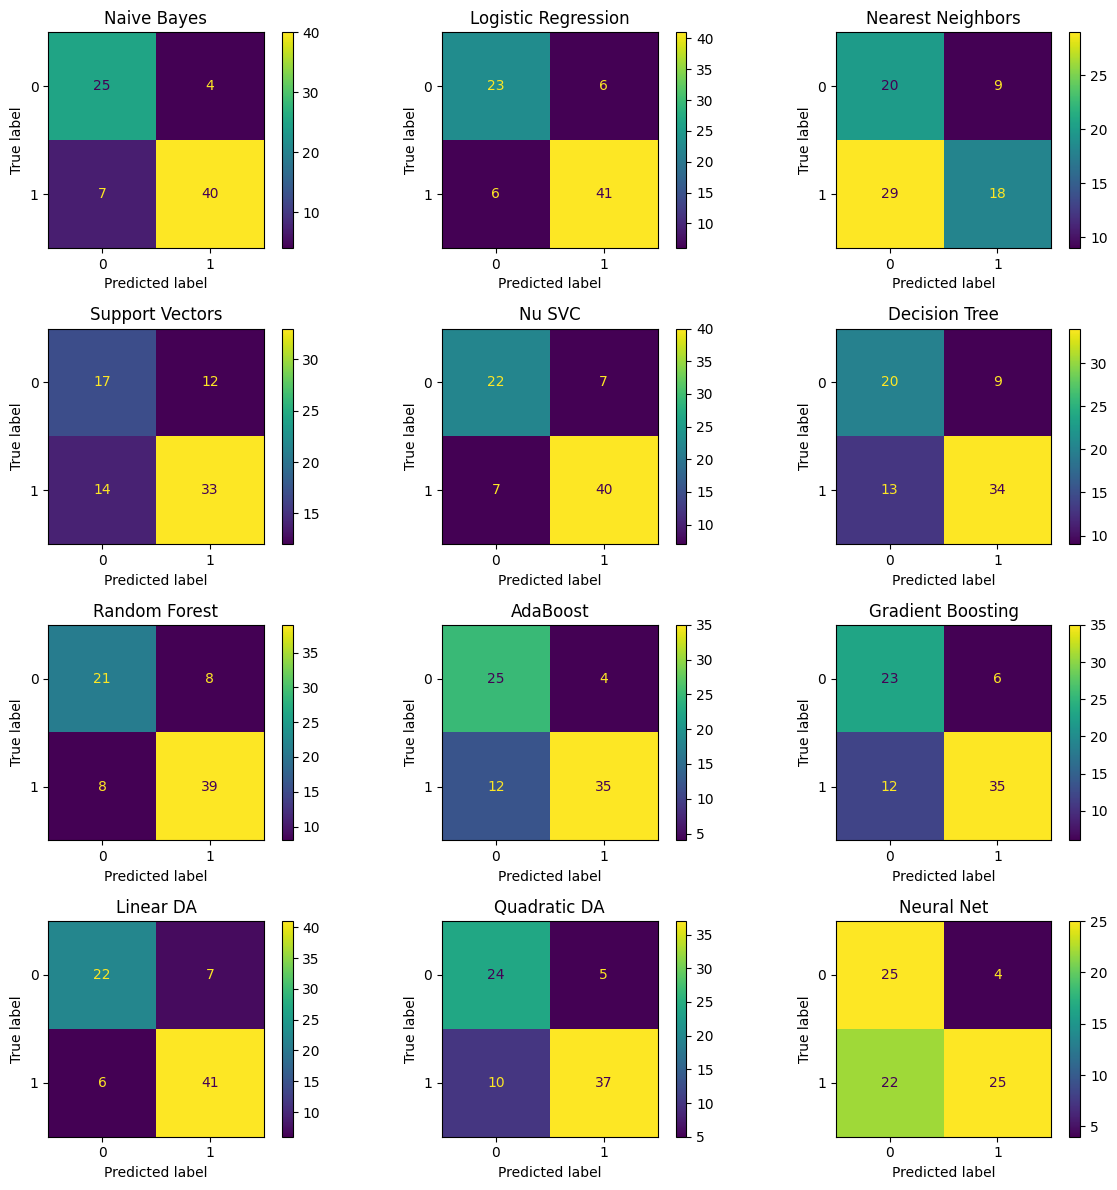

In [37]:
import csv
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import missingno

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
import shap 


# Loading the dataset
# heartds0 = pd.read_csv('https://raw.githubusercontent.com/orionmc/SoftEng0/main/heart0.csv')
heartds0 = pd.read_csv(r'C:\Users\user0\Documents\BPP\Software Engineering\Git\0\SoftEng0\SoftEng0\heart.ds.csv')

# For quick overview of the data we can use either tail or head functions
print("\nLast 6 rows\n",heartds0.tail(6),sep=os.linesep)
print("\nFirst 6 rows\n",heartds0.head(6),sep=os.linesep)

print("\nPrint the shape of the dataset - number of rows and columns:",heartds0.shape)

# check for missing values in the dataset
print("\nSum of null values for each column\n",heartds0.isnull().sum())   
# General information about the data set
heartds0.info()

# for better visuall demonstration we can use a bar chart to visuallise
missingno.bar(heartds0, color = "c")
plt.show()

# rectify the missing values in the dataset can be done in multiple ways
# we can simply use dropna() to drop the rows with missing values
# heartds_no_missing = heartds0.dropna() 
# as we can see from the above function's output - we haven't got any missing values

heartds0[heartds0.duplicated()]            # check for duplicate rows in the dataset
heartds0.drop_duplicates(inplace=True)     # drop the duplicate rows in the dataset

# Print basic stat
print("\nBasic Stat\n",heartds0.describe(),sep=os.linesep)
sns.countplot(x='sex', data=heartds0)
plt.show()

# Grouping values by their type
numberic_var=['age','chol','trtbps','thalachh','old_peak','caa']
cat_var=['sex','fbs','exng','output','cp','rest_ecg','slp','thall']


mypal = ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
ax = sns.countplot(x=heartds0['output'], palette=mypal[1::4])

def label_encode_cat_features(heartds0, cat_var):
# Given a dataframe and its categorical features, # this function returns label-encoded dataframe
    label_encoder = LabelEncoder()
    heartds0_encoded = heartds0.copy()
    for col in cat_var:
        heartds0_encoded[col] = label_encoder.fit_transform(heartds0[col])
    heartds0 = heartds0_encoded
    return heartds0

def score_summary(names, classifiers):
    # For the list of classiers, this function calculates the accuracy, 
    # ROC_AUC and Recall and returns the values in a dataframe
        
    cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
    heartds0_table = pd.DataFrame(columns=cols)
    
    for name, clf in zip(names, classifiers):        
        clf.fit(X_train, y_train)
        
        pred = clf.predict(X_val)
        accuracy = accuracy_score(y_val, pred)

        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)        
        roc_auc = auc(fpr, tpr)
        
        # confusion matric, cm
        cm = confusion_matrix(y_val, pred) 
        
        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])
        
        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])
        
        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
        # heartds0_table = heartds0_table.concat(df)     
        heartds0_table = pd.concat([heartds0_table, df])

    return(np.round(heartds0_table.reset_index(drop=True), 2))

def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    # Plots matric of confusion matrices
    # Arguments:
    #     names         : list of names of the classifier
    #     classifiers   : list of classification algorithms
    #     nrows, ncols  : number of rows and rows in the plots
    #     fig_a, fig_b  : dimensions of the figure
       
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    
    for i, (clf, ax) in enumerate(zip(classifiers, axes.flatten())):
        
        clf.fit(X_train, y_train)  
        # Compute confusion matrix
        pred = clf.predict(X_val)
        cm = confusion_matrix(y_val, pred)
        # Create ConfusionMatrixDisplay object
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        
        # Plot the confusion matrix on the given axis
        disp.plot(ax=ax)
        ax.title.set_text(names[i]) 
      
    plt.tight_layout() 
    plt.show()
def roc_auc_curve(names, classifiers):
    
    # ROC curves according to the list of classifiers
    
    plt.figure(figsize=(12, 8))   
        
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        
        pred_proba = clf.predict_proba(X_val)[:, 1]
        
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='b', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=18)
        plt.legend(loc="lower right")        

# split the data into train and test sets

cat_variables = cat_var
heartds0 = label_encode_cat_features(heartds0, cat_var)

seed = 0
test_size = 0.25

features = heartds0.columns[:-1]

X = heartds0[features]
y = heartds0['output']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state=seed)

names = [
    'Naive Bayes',
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Nu SVC',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

classifiers = [
    GaussianNB(),
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    NuSVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]


score_summary = score_summary(names, classifiers).sort_values(by='Accuracy', ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

display(score_summary)

roc_auc_curve(names, classifiers)
plot_conf_matrix(names, classifiers, nrows=4, ncols=3, fig_a=12, fig_b=12)



